# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Farah Ahmed Hamed Kandil

ID: 49-9785

Tutorial: 6

---

Name: Lina Ehab Elnaggar

ID: 49-1707

Tutorial: 6


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


In [ ]:
df.describe()

,year,condition
count,46578.000000,46578.000000
mean,2010.203401,3.424265
std,3.831316,0.944009
min,1990.000000,1.000000
25%,2008.000000,2.700000
50%,2012.000000,3.600000
75%,2013.000000,4.200000
max,2015.000000,5.000000


In [ ]:
#to include categorical values in describe
df.describe(include='all')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,46578.000000,46578,46578,46578,46578,46578,46578,46578,46578.000000,46578,46578,46578,46578,46578,46578,46578
unique,NaN,48,648,1097,71,2,46578,34,NaN,39460,20,17,4686,1021,953,2286
top,NaN,Ford,Altima,Base,Sedan,automatic,5npeb4acxdh702805,fl,NaN,1.0mi,black,black,"ford motor credit company,llc",$11300,$12000,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,7871,1610,4851,17171,44928,1,7451,NaN,86,9156,20734,1733,168,397,490
mean,2010.203401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.424265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.831316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#to check if there are missing values
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [ ]:
#to check if there are duplicate rows/records
sum(df.duplicated())

0

This indicates that the dataset has no duplicate rows

In [ ]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


interior column has one of its values as '--'

In [ ]:
#investigating the unique possible values of the column interior and their unique values
df.value_counts(df['interior'])

interior
black        20734
gray         15020
beige         4917
tan           3777
—              988
brown          694
blue           101
red             92
silver          88
off-white       39
purple          31
gold            26
white           23
burgundy        20
green           16
orange          11
yellow           1
dtype: int64

interior column has one of its values as '-'

In [ ]:
df.tail()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0mi,—,gray,wheels exchange llc,$15650,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0mi,black,black,nissan infiniti lt,$19350,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0mi,white,beige,motorcars of south texas,$22200,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0mi,black,beige,avis rac/san leandro,$13400,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
46577,2013,Kia,Rio,LX,Sedan,automatic,knadm4a32d6164825,ga,4.1,49953.0mi,silver,black,kia motors finance,$9700,$9300,Thu Dec 18 2014 10:00:00 GMT-0800 (PST)


Color has one of the color as '--'


In [ ]:
#investigating the unique possible values of the column color and their unique values
df.value_counts(df['color'])

color
black        9156
white        8693
gray         7046
silver       6982
blue         4244
red          3685
—            2246
gold          948
green         891
burgundy      785
beige         744
brown         529
orange        195
purple        137
off-white     129
yellow         99
charcoal       49
turquoise      15
pink            3
lime            2
dtype: int64

One of the colors are '--'


In [ ]:
df.corr()

,year,condition
year,1.000000,0.549158
condition,0.549158,1.000000


In [ ]:
#checking the values of body 
df['body'].unique()

array(['sedan', 'SUV', 'Sedan', 'E-Series Van', 'Crew Cab', 'suv',
       'G Sedan', 'Wagon', 'Regular Cab', 'Double Cab', 'wagon', 'Coupe',
       'Minivan', 'SuperCrew', 'coupe', 'convertible', 'Extended Cab',
       'Hatchback', 'van', 'hatchback', 'Van', 'Convertible', 'SuperCab',
       'g sedan', 'king cab', 'G Convertible', 'King Cab', 'extended cab',
       'quad cab', 'supercab', 'Beetle Convertible', 'minivan', 'G Coupe',
       'Quad Cab', 'crew cab', 'supercrew', 'CrewMax Cab', 'double cab',
       'g coupe', 'Club Cab', 'Access Cab', 'Genesis Coupe',
       'e-series van', 'G37 Convertible', 'Cab Plus 4', 'crewmax cab',
       'genesis coupe', 'promaster cargo van', 'access cab', 'Mega Cab',
       'Koup', 'regular cab', 'mega cab', 'Elantra Coupe',
       'Q60 Convertible', 'regular-cab', 'Promaster Cargo Van', 'Xtracab',
       'CTS Coupe', 'CTS Wagon', 'GranTurismo Convertible',
       'beetle convertible', 'TSX Sport Wagon', 'g convertible',
       'tsx sport wagon', '

Several body types are repeated with different cases for example: sedan is repeated again as **S**edan

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [ ]:
#making a copy of the original dataframe
df_copy=df.copy()


In [ ]:
#removing the 'mi' from odometer
df_copy['odometer']=df_copy['odometer'].str.replace('mi','')
df_copy.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [ ]:
#changing the type of odometer from obj to float
df_copy['odometer']=df_copy['odometer'].astype(float)

In [ ]:
#checking that the type of odometer is changed 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  float64
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 5.7+ MB


In [ ]:
#removing the $ sign of mmr
df_copy['mmr']=df_copy['mmr'].str.replace('$','')
df_copy.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,—,award auto sales and leasing inc,28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [ ]:
#changing the type of mmr from obj to int
df_copy['mmr']=df_copy['mmr'].astype(int)

In [ ]:
#checking that the type of mmr is changed 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  float64
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  int64  
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 5.7+ MB


In [ ]:
#removing the $ sign of sellingprice
df_copy['sellingprice']=df_copy['sellingprice'].str.replace('$','')
df_copy.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,—,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [ ]:
#changing the type of sellingprice from object to int
df_copy['sellingprice']=df_copy['sellingprice'].astype(int)

In [ ]:
#checking that the type of sellingprice is changed 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  float64
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  int64  
 14  sellingprice  46578 non-null  int64  
 15  saledate      46578 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 5.7+ MB


In [ ]:
#dealing with missing values in color 
df_copy['color']=df_copy['color'].str.replace('—','missing')

In [ ]:
#checking that the missing value is handled
df_copy.value_counts(df_copy['color'])

color
black        9156
white        8693
gray         7046
silver       6982
blue         4244
red          3685
missing      2246
gold          948
green         891
burgundy      785
beige         744
brown         529
orange        195
purple        137
off-white     129
yellow         99
charcoal       49
turquoise      15
pink            3
lime            2
dtype: int64

In [ ]:
#dealing with missing values in interior 
df_copy['interior']=df_copy['interior'].str.replace('—','missing')


In [ ]:
#checking that the missing value is handled
df_copy.value_counts(df_copy['interior'])

interior
black        20734
gray         15020
beige         4917
tan           3777
missing        988
brown          694
blue           101
red             92
silver          88
off-white       39
purple          31
gold            26
white           23
burgundy        20
green           16
orange          11
yellow           1
dtype: int64

In [ ]:
df_copy.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,missing,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  float64
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  int64  
 14  sellingprice  46578 non-null  int64  
 15  saledate      46578 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 5.7+ MB


This shows that mmr has the highest correlation with the sellingprice while year and odometer almost have the same medium correlation with sellingprice and conditon have medium correlation 

In [ ]:
#dropping feature vin as it does not affect the selling price in any way
df_copy=df_copy.drop('vin',axis=1)
df_copy.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,ma,3.9,50404.0,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,fl,4.9,17846.0,gray,missing,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,fl,4.1,21122.0,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,fl,1.9,145303.0,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,wa,4.9,6714.0,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [ ]:
#changing the first case of each body type to avoid duplication and inconsistencies 
df_copy['body']=df_copy['body'].str.upper()

In [ ]:
#checking that the body types are not repeated
df_copy['body'].unique()

array(['SEDAN', 'SUV', 'E-SERIES VAN', 'CREW CAB', 'G SEDAN', 'WAGON',
       'REGULAR CAB', 'DOUBLE CAB', 'COUPE', 'MINIVAN', 'SUPERCREW',
       'CONVERTIBLE', 'EXTENDED CAB', 'HATCHBACK', 'VAN', 'SUPERCAB',
       'KING CAB', 'G CONVERTIBLE', 'QUAD CAB', 'BEETLE CONVERTIBLE',
       'G COUPE', 'CREWMAX CAB', 'CLUB CAB', 'ACCESS CAB',
       'GENESIS COUPE', 'G37 CONVERTIBLE', 'CAB PLUS 4',
       'PROMASTER CARGO VAN', 'MEGA CAB', 'KOUP', 'ELANTRA COUPE',
       'Q60 CONVERTIBLE', 'REGULAR-CAB', 'XTRACAB', 'CTS COUPE',
       'CTS WAGON', 'GRANTURISMO CONVERTIBLE', 'TSX SPORT WAGON',
       'CTS-V COUPE', 'Q60 COUPE', 'TRANSIT VAN'], dtype=object)

Checking the values in each type of body 

In [ ]:
#checking the unique values of sedan
sedan_values=df_copy[df_copy['body'].str.contains('SEDAN')==True]
sedan_values['body'].value_counts()

SEDAN      20857
G SEDAN      717
Name: body, dtype: int64

After knowing the different sedan values, we found that there are G SEDAN and SEDAN values so we will replace the G SEDAN with SEDAN

In [ ]:
#replacing G SEDAN with SEDAN 
df_copy['body']=df_copy['body'].str.replace('G SEDAN','SEDAN')

In [ ]:
#ensuring that G SEDAN is replaced by SEDAN
df_copy[df_copy['body'].str.contains('G SEDAN')==True]

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate


This shows that G SEDAN is no longer in the data and is replaced by SEDAN

Repeating the same process for all other values of body

For coupe

In [ ]:
#checking values of coupe
coupe_values=df_copy[df_copy['body'].str.contains('COUPE')==True]
coupe_values['body'].value_counts()

COUPE            1563
G COUPE           170
GENESIS COUPE      22
CTS COUPE          10
ELANTRA COUPE       6
CTS-V COUPE         2
Q60 COUPE           2
Name: body, dtype: int64

In [ ]:
#replace different coupe values with coupe only
df_copy['body']=df_copy['body'].str.replace('G COUPE','COUPE')
df_copy['body']=df_copy['body'].str.replace('GENESIS COUPE','COUPE')
df_copy['body']=df_copy['body'].str.replace('CTS COUPE','COUPE')
df_copy['body']=df_copy['body'].str.replace('ELANTRA COUPE','COUPE')
df_copy['body']=df_copy['body'].str.replace('CTS-V COUPE','COUPE')
df_copy['body']=df_copy['body'].str.replace('Q60 COUPE','COUPE')

In [ ]:
#replacing koup with coupe
df_copy['body']=df_copy['body'].str.replace('KOUP','COUPE')

In [ ]:
#ensuring the other COUPE values are replaced by COUPE only
df_copy[df_copy['body'].str.contains('G COUPE')==True]
df_copy[df_copy['body'].str.contains('GENSIS COUPE')==True]
df_copy[df_copy['body'].str.contains('CTS COUPE')==True]
df_copy[df_copy['body'].str.contains('ELANTRA COUPE')==True]
df_copy[df_copy['body'].str.contains('CTS-V COUPE')==True]
df_copy[df_copy['body'].str.contains('Q60 COUPE')==True]
df_copy[df_copy['body'].str.contains('koup')==True]

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate


Convertible

In [ ]:
convertible_values=df_copy[df_copy['body'].str.contains('CONVERTIBLE')==True]
convertible_values['body'].value_counts()

CONVERTIBLE                919
G CONVERTIBLE               30
BEETLE CONVERTIBLE           9
G37 CONVERTIBLE              2
Q60 CONVERTIBLE              2
GRANTURISMO CONVERTIBLE      2
Name: body, dtype: int64

In [ ]:
#replace different convertible values with convertible only
df_copy['body']=df_copy['body'].str.replace('G CONVERTIBLE','CONVERTIBLE')
df_copy['body']=df_copy['body'].str.replace('BEETLE CONVERTIBLE','CONVERTIBLE')
df_copy['body']=df_copy['body'].str.replace('G37 CONVERTIBLE','CONVERTIBLE')
df_copy['body']=df_copy['body'].str.replace('Q60 CONVERTIBLE','CONVERTIBLE')
df_copy['body']=df_copy['body'].str.replace('GRANTURISMO CONVERTIBLE','CONVERTIBLE')

Hatchback


In [ ]:
hatchback_values=df_copy[df_copy['body'].str.contains('HATCHBACK')==True]
hatchback_values['body'].value_counts()

HATCHBACK    2270
Name: body, dtype: int64

Hatchback has no other different values

SUV

In [ ]:
suv_values=df_copy[df_copy['body'].str.contains('SUV')==True]
suv_values['body'].value_counts()

SUV    11936
Name: body, dtype: int64

SUV has no other different values

VAN

In [ ]:
van_values=df_copy[df_copy['body'].str.contains('VAN')==True]
van_values['body'].value_counts()

MINIVAN                2189
VAN                     332
E-SERIES VAN            100
PROMASTER CARGO VAN      10
TRANSIT VAN               1
Name: body, dtype: int64

In [ ]:
#replace different van values with minivan only
df_copy['body']=df_copy['body'].str.replace('E-SERIES VAN','MINIVAN')
df_copy['body']=df_copy['body'].str.replace('VAN','MINIVAN')
df_copy['body']=df_copy['body'].str.replace('PROMASTER CARGO VAN','MINIVAN')
df_copy['body']=df_copy['body'].str.replace('TRANSIT VAN','MINIVAN')

In [ ]:
minivan_values=df_copy[df_copy['body'].str.contains('MINIVAN')==True]
minivan_values['body'].unique()

array(['MINIMINIVAN', 'MINIVAN', 'PROMASTER CARGO MINIVAN',
       'TRANSIT MINIVAN'], dtype=object)

In [ ]:
#replace different minivan values with minivan only
df_copy['body']=df_copy['body'].str.replace('MINIMINIVAN','MINIVAN')
df_copy['body']=df_copy['body'].str.replace('PROMASTER CARGO MINIVAN','MINIVAN')
df_copy['body']=df_copy['body'].str.replace('TRANSIT MINIVAN','MINIVAN')

In [ ]:
#checking that only it is only minivan
df_copy['body'].unique()

array(['SEDAN', 'SUV', 'MINIVAN', 'CREW CAB', 'WAGON', 'REGULAR CAB',
       'DOUBLE CAB', 'COUPE', 'SUPERCREW', 'CONVERTIBLE', 'EXTENDED CAB',
       'HATCHBACK', 'SUPERCAB', 'KING CAB', 'QUAD CAB', 'CREWMAX CAB',
       'CLUB CAB', 'ACCESS CAB', 'CAB PLUS 4', 'MEGA CAB', 'REGULAR-CAB',
       'XTRACAB', 'CTS WAGON', 'TSX SPORT WAGON'], dtype=object)

WAGON

In [ ]:
wagon_values=df_copy[df_copy['body'].str.contains('WAGON')==True]
wagon_values['body'].value_counts()

WAGON              1434
TSX SPORT WAGON       3
CTS WAGON             1
Name: body, dtype: int64

In [ ]:
#replace different wagon values with wagon only
df_copy['body']=df_copy['body'].str.replace('TSX SPORT WAGON','WAGON')
df_copy['body']=df_copy['body'].str.replace('CTS WAGON','WAGON')

PICKUP TRUCKS (INDICATED BY CAP)

In [ ]:
pickup_values=df_copy[df_copy['body'].str.contains('CAB')==True]
pickup_values['body'].value_counts()

CREW CAB        1409
SUPERCAB         433
REGULAR CAB      399
EXTENDED CAB     397
QUAD CAB         318
DOUBLE CAB       137
CREWMAX CAB       52
KING CAB          40
ACCESS CAB        19
CLUB CAB          17
MEGA CAB           8
XTRACAB            5
CAB PLUS 4         2
REGULAR-CAB        1
Name: body, dtype: int64

In [ ]:
#replace different wagon values with wagon only
df_copy['body']=df_copy['body'].str.replace('CREW CAB','PICKUP TRUCK')
df_copy['body']=df_copy['body'].str.replace('SUPERCAB','PICKUP TRUCK')
df_copy['body']=df_copy['body'].str.replace('REGULAR CAB','PICKUP TRUCK')
df_copy['body']=df_copy['body'].str.replace('EXTENDED CAB','PICKUP TRUCK')
df_copy['body']=df_copy['body'].str.replace('QUAD CAB','PICKUP TRUCK')
df_copy['body']=df_copy['body'].str.replace('DOUBLE CAB','PICKUP TRUCK')
df_copy['body']=df_copy['body'].str.replace('CREWMAX CAB','PICKUP TRUCK')
df_copy['body']=df_copy['body'].str.replace('KING CAB','PICKUP TRUCK')
df_copy['body']=df_copy['body'].str.replace('ACCESS CAB','PICKUP TRUCK')
df_copy['body']=df_copy['body'].str.replace('CLUB CAB','PICKUP TRUCK')
df_copy['body']=df_copy['body'].str.replace('MEGA CAB','PICKUP TRUCK')
df_copy['body']=df_copy['body'].str.replace('XTRACAB','PICKUP TRUCK')
df_copy['body']=df_copy['body'].str.replace('CAB PLUS 4','PICKUP TRUCK')
df_copy['body']=df_copy['body'].str.replace('REGULAR-CAB','PICKUP TRUCK')

In [ ]:
#we will replace supercrew as well to be pickup truck
df_copy['body']=df_copy['body'].str.replace('SUPERCREW','PICKUP TRUCK')

In [ ]:
#checking that body types are reduced to certain types like Sedan, Coupe, Convertible, Hatchback, SUV, Minivan, Wagon, and Pickup Truck (cab)
df_copy['body'].unique()

array(['SEDAN', 'SUV', 'MINIVAN', 'PICKUP TRUCK', 'WAGON', 'COUPE',
       'CONVERTIBLE', 'HATCHBACK'], dtype=object)

In [ ]:
#capitalizing body values
df_copy['body']=df_copy['body'].str.capitalize()

In [ ]:
#upper case to Suv
df_copy['body']=df_copy['body'].str.replace('Suv','SUV')

## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

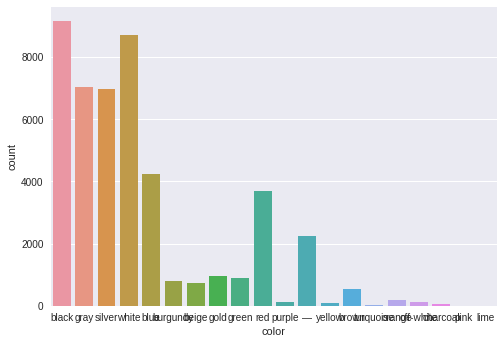

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

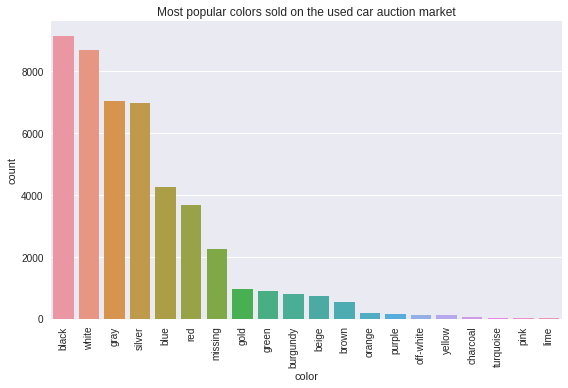

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df_copy.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df_copy, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

Black

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

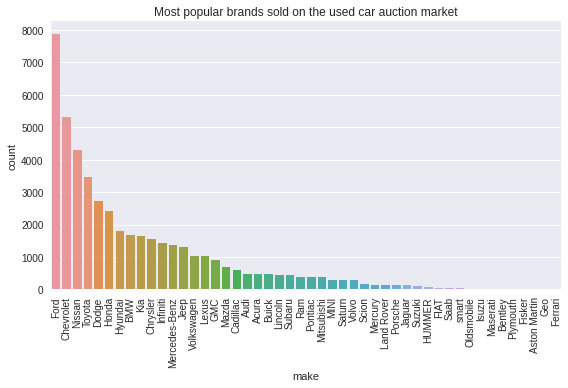

In [ ]:
large_to_small = df_copy.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df_copy, order=large_to_small.index).set(title='Most popular brands sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q1**: Ford, Chevrolet and Nissan

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

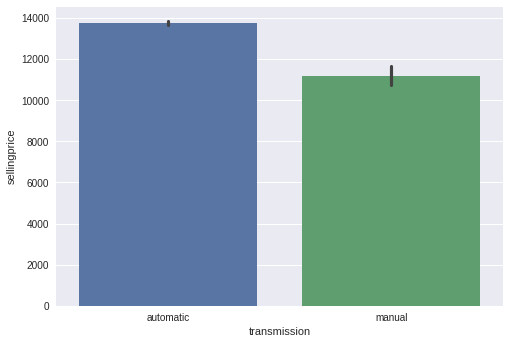

In [ ]:
sns.barplot(data=df_copy, x='transmission', y='sellingprice')

**Answer for Q2**: Yes, on average, automatic has a better selling price than manual

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

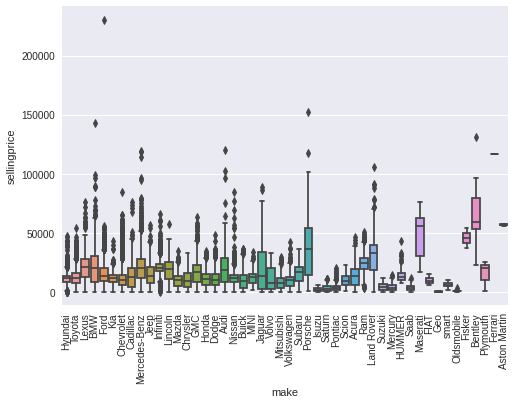

In [ ]:
sns.boxplot(data=df_copy, x='make',y='sellingprice')
plt.xticks(rotation=90)
plt.tight_layout

**Answer for Q3**: Cars that have wider distrubition are Porsche and Maserati, while the most expensive are Bentely and Porsche

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

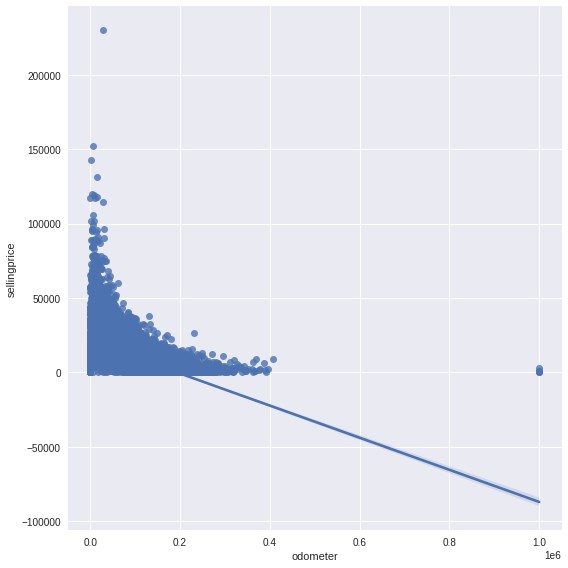

In [ ]:
sns.lmplot(x='odometer', y='sellingprice', data=df_copy, palette='magma', height=8);

**Answer for Q4**: Odometer is negatively correlated with selling price

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

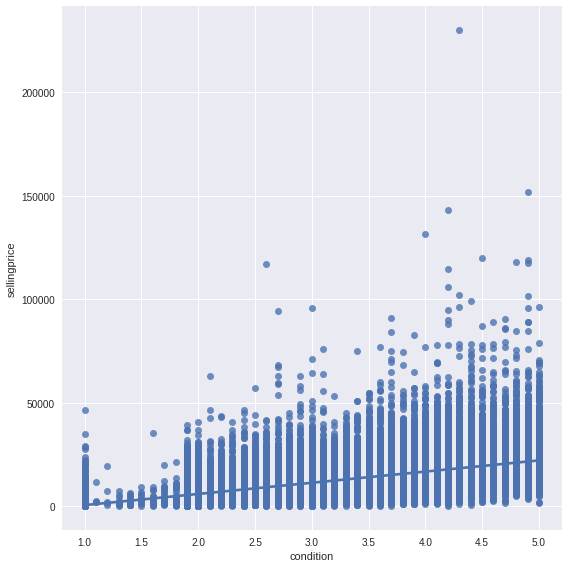

In [ ]:
sns.lmplot(x='condition', y='sellingprice', data=df_copy, palette='magma', height=8);

**Answer for Q5**: There is a slight positive correlation between condition and the selling price

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

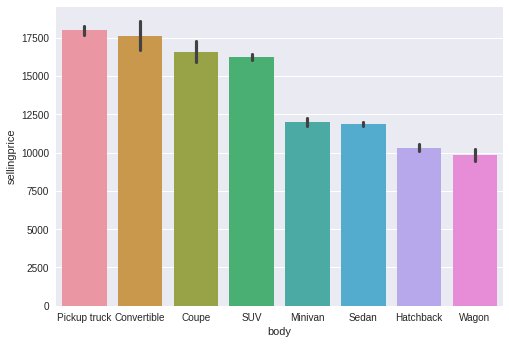

In [ ]:
large_to_small=df_copy[['sellingprice','body']].groupby('body').mean().sort_values('sellingprice',ascending=False).index
sns.barplot(x='body',y='sellingprice',data=df_copy,order=large_to_small)

**Answer for Q6**: Yes, there are differences in the average price, with Pickup Truck being the expensive, followed by Convertible, then Coupe, then SUV, then Minivan, followed by Sedan, then Hatchback, and Wagon the least expensive.

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [ ]:
df_copy.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,ma,3.9,50404.0,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,fl,4.9,17846.0,gray,missing,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,fl,4.1,21122.0,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,fl,1.9,145303.0,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,wa,4.9,6714.0,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [ ]:
y=df_copy.corr()
y['sellingprice'].sort_values(ascending=False, key=lambda x: x.abs())

sellingprice    1.000000
mmr             0.979783
year            0.581164
odometer       -0.580900
condition       0.529141
Name: sellingprice, dtype: float64

In [ ]:
#dropping saledate, seller, mmr, state
df_copy=df_copy.drop(['saledate','mmr','color','seller','state','trim','model'], axis=1)

In [ ]:
x=df_copy.corr()
x['sellingprice'].sort_values(ascending=False, key=lambda x: x.abs())

sellingprice    1.000000
year            0.581164
odometer       -0.580900
condition       0.529141
Name: sellingprice, dtype: float64

We will remove saledate as based on domain knowledge, the date of selling will not affect the selling price, moreover, we will remove mmr as it had high correlation with selling price which will affect the model, moreover, we removed vin as the vehicle identification number will not affect the selling price as it is an identification for the car. In addition we remove the color as it is not one of the main factors that customers look for when buying a car, but rather they focus on performance. The seller was removed as due to domain knowledge, it can be a car agency or a wholesaler that sells cars and this does not contribute to car prices. The state was removed as it does not contribute to the performance of the car and will not be a good determinant of the car's selling price. Finally, the model was removed as models are subjective and based on people's prefences therefore, it would not be a good indicator of the car's selling price.

We have kept the make, transmission, body and interior columns.

**Transmission manual**

This feature is about transmitting engine power to the wheels, which enables your car to move. It is crucial to be aware of the transmission manual as it is responsible for ensuring that the right amount of power is transmitted to the wheels so that it can run at a certain pace.

**Year** 

We chose the attribute year because it's necessary to know the year a car was made in order to compare its features and standards to the current date, and knowing how long this car had the certain features and standars. 

**Body** 

The body is regarded as the most essential component in terms of functionality.Since it has a significant impact on the car's pricing, it is crucial to take it into account. This is as shape of the body of the car ultimately determines what you can accomplish with it. As a result, it may be the most crucial component in terms of utility.

**Odometer**

We decided to keep it because the odometer is the first thing you look at when purchasing a used car. A car with a high mileage will undoubtedly be in worse shape than one with a lesser mileage. The number of kilometers on the odometer has a substantial impact on how much a car is valued on the secondhand market. A car that loses value due to high mileage will most probably also lose value as it ages and experiences normal wear and tear.

**Condition**

We also choose to keep the condition because a vehicle's overall condition can significantly affect its pricing depending on whether there is obvious or significant damage to the interior (such as a board, seat, or covering) or exterior (such as a crash or shoddy paint job). As a result, it was clear that the price of the car would be impacted by its condition.

**Interior** 

Features of the car's interior include the steering wheel, seats, carpets, radios, and air vents, which they all tend to contribute to the comfort and safety of the driver and the passengers and leads to happy customer, which is why we chose to keep the interior of the car.

In [ ]:
#will do one-hot encoding for the remaining undropped columns as it is better and will not result in ranking as in label encoding, thus, not affecting the model
categorical_columns = ['make','transmission','body','interior']
df_copy = pd.get_dummies(data=df_copy,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')

# Let's have a look at the difference in data before/after encoding
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_copy.columns.values)
print('\nNumber of rows and columns in the dataset:',df_copy.shape)

Columns in original data frame:
 ['year' 'make' 'model' 'trim' 'body' 'transmission' 'vin' 'state'
 'condition' 'odometer' 'color' 'interior' 'seller' 'mmr' 'sellingprice'
 'saledate']

Number of rows and columns in the dataset: (46578, 16)

Columns in data frame after encoding dummy variable:
 ['year' 'condition' 'odometer' 'sellingprice' 'make_Aston Martin'
 'make_Audi' 'make_BMW' 'make_Bentley' 'make_Buick' 'make_Cadillac'
 'make_Chevrolet' 'make_Chrysler' 'make_Dodge' 'make_FIAT' 'make_Ferrari'
 'make_Fisker' 'make_Ford' 'make_GMC' 'make_Geo' 'make_HUMMER'
 'make_Honda' 'make_Hyundai' 'make_Infiniti' 'make_Isuzu' 'make_Jaguar'
 'make_Jeep' 'make_Kia' 'make_Land Rover' 'make_Lexus' 'make_Lincoln'
 'make_MINI' 'make_Maserati' 'make_Mazda' 'make_Mercedes-Benz'
 'make_Mercury' 'make_Mitsubishi' 'make_Nissan' 'make_Oldsmobile'
 'make_Plymouth' 'make_Pontiac' 'make_Porsche' 'make_Ram' 'make_Saab'
 'make_Saturn' 'make_Scion' 'make_Subaru' 'make_Suzuki' 'make_Toyota'
 'make_Volkswagen' 'ma

In [ ]:
df_copy.head()

,year,condition,odometer,sellingprice,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,make_Cadillac,...,interior_green,interior_missing,interior_off-white,interior_orange,interior_purple,interior_red,interior_silver,interior_tan,interior_white,interior_yellow
0,2013,3.9,50404.0,10900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,4.9,17846.0,29900,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2012,4.1,21122.0,24200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2002,1.9,145303.0,3200,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,4.9,6714.0,22100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Modelling

_Apply the linear regression model below._

In [ ]:
#changing the df_copy to df
df=df_copy

Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop('sellingprice',axis=1) # Independent variable
y = df['sellingprice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 37262
Testing dataset size: 9316


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train);

In [ ]:
df.head()

,year,condition,odometer,sellingprice,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,make_Cadillac,...,interior_green,interior_missing,interior_off-white,interior_orange,interior_purple,interior_red,interior_silver,interior_tan,interior_white,interior_yellow
0,2013,3.9,50404.0,10900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,4.9,17846.0,29900,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2012,4.1,21122.0,24200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2002,1.9,145303.0,3200,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,4.9,6714.0,22100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,-1.887525e+06
1,theta_1,year,9.467094e+02
2,theta_2,condition,1.690878e+03
3,theta_3,odometer,-4.272997e-02
4,theta_4,make_Aston Martin,3.713942e+04
...,...,...,...
70,theta_70,interior_red,5.689427e+03
71,theta_71,interior_silver,-1.136717e+03
72,theta_72,interior_tan,-6.368000e+01
73,theta_73,interior_white,-2.727733e+03


## Model Evaluation


In [ ]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  5408.661422195137
R^2 obtained is: 0.6833661638372543


## Model Validation (Optional)

_Check if the model you applied meets the necessary assumptions for the chosen model._

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**:

RMSE is used is a measure of the distances between the actual points and the predicted points. Having RMSE of 5408 can be considered high and it is important to reduce that error in the future. Moreover, R-square measures the linear regression model's goodness of fit as well as it determines the proportion of variance in the dependent variable that can be explained by the independent variable. Therefore, a value of 0.68 for R-square can be considered a good fit, however, a better value can be obtained and therefore, based on the result, we recommend using a different model for example, such as decision trees to classify based on what features a car can have a certain selling price. Decision trees will have a better average. 

The problems faced in this dataset were data inconsistencies such as in different body types were stored with different ways, having some capitalized while the other with lowercase, which had led to redundancies. The data had missing values as in color and interior, and the data types were not appropriate. We, therefore, having fewer data inconsistencies and missing values as this highly affects the result model and reduce the accuracy of the model.Another approach could be replacing the missing values with the mean or median in order to avoid any bias in them. Moreover, in case of integer values that were stored with a wrong data type, we recommend setting the attributes from the beginning to be integers to be able to easily deduce the correlations between the independent and dependent variables. We can also try to predict outliers to ensure the model is not affected by any bias.

